In [47]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 224
base_dir = r"Fiz Dataset"


In [63]:
# ------------------------------
# Preprocessing functions
# ------------------------------
def crop_image_from_gray(img, tol=7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1), mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        if img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0] == 0:
            return img
        img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
        img2 = img[:, :, 1][np.ix_(mask.any(1), mask.any(0))]
        img3 = img[:, :, 2][np.ix_(mask.any(1), mask.any(0))]
        return np.stack([img1, img2, img3], axis=-1)

def preprocess_image_with_ben(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = crop_image_from_gray(image)
    image = cv2.addWeighted(image, 4,
                            cv2.GaussianBlur(image, (0, 0), sigmaX),
                            -4, 128)
    return image

In [64]:
# ------------------------------
# Collect image paths
# ------------------------------
benign_dir = os.path.join(base_dir, 'benign')
malignant_dir = os.path.join(base_dir, 'malignant')

benign_paths    = [os.path.join(benign_dir, f)
                   for f in os.listdir(benign_dir)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
malignant_paths = [os.path.join(malignant_dir, f)
                   for f in os.listdir(malignant_dir)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Benign images    : {len(benign_paths)}")
print(f"Malignant images : {len(malignant_paths)}")

Benign images    : 3
Malignant images : 3


In [65]:
# ------------------------------
# Choose up to 5 images/class
# ------------------------------
benign_show    = benign_paths[:3]
malignant_show = malignant_paths[:3]

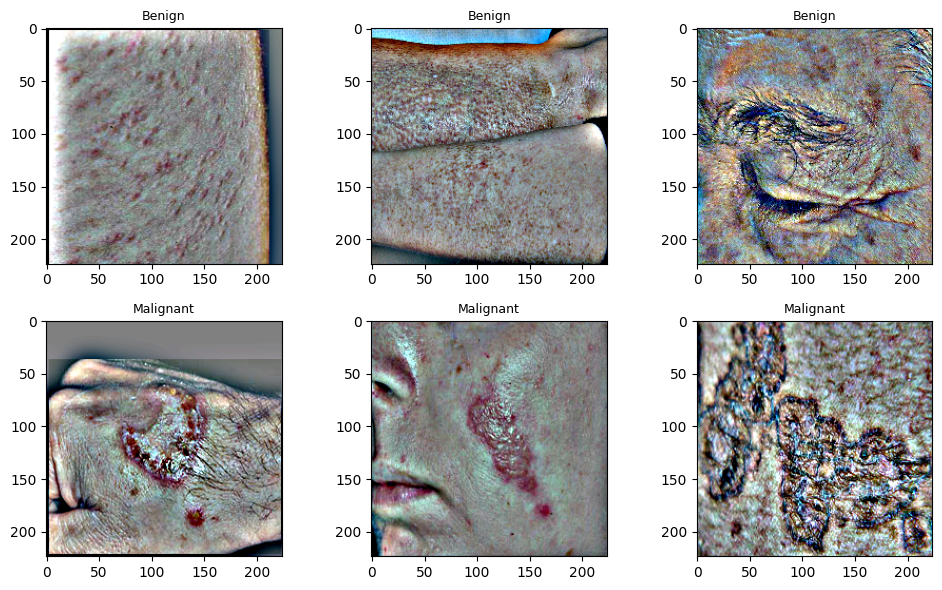

In [66]:
# ------------------------------
# Plot: 2 rows × 3 columns (with axes visible)
# ------------------------------
cols = 3          # three columns
rows = 2          # two rows (top=benign, bottom=malignant)
fig, ax = plt.subplots(rows, cols, figsize=(10, 6))

# Ensure we only take up to 3 images from each class
benign_show_3 = benign_show[:cols]
malignant_show_3 = malignant_show[:cols]

# --- Top row: Benign ---
for i in range(cols):
    if i < len(benign_show_3):
        img = preprocess_image_with_ben(benign_show_3[i])
        ax[0, i].imshow(img)
        ax[0, i].set_title("Benign", fontsize=9)
        ax[0, i].axis("on")      # keep axes/ticks visible
        ax[0, i].grid(False)

# --- Bottom row: Malignant ---
for i in range(cols):
    if i < len(malignant_show_3):
        img = preprocess_image_with_ben(malignant_show_3[i])
        ax[1, i].imshow(img)
        ax[1, i].set_title("Malignant", fontsize=9)
        ax[1, i].axis("on")
        ax[1, i].grid(False)

plt.tight_layout()
plt.show()


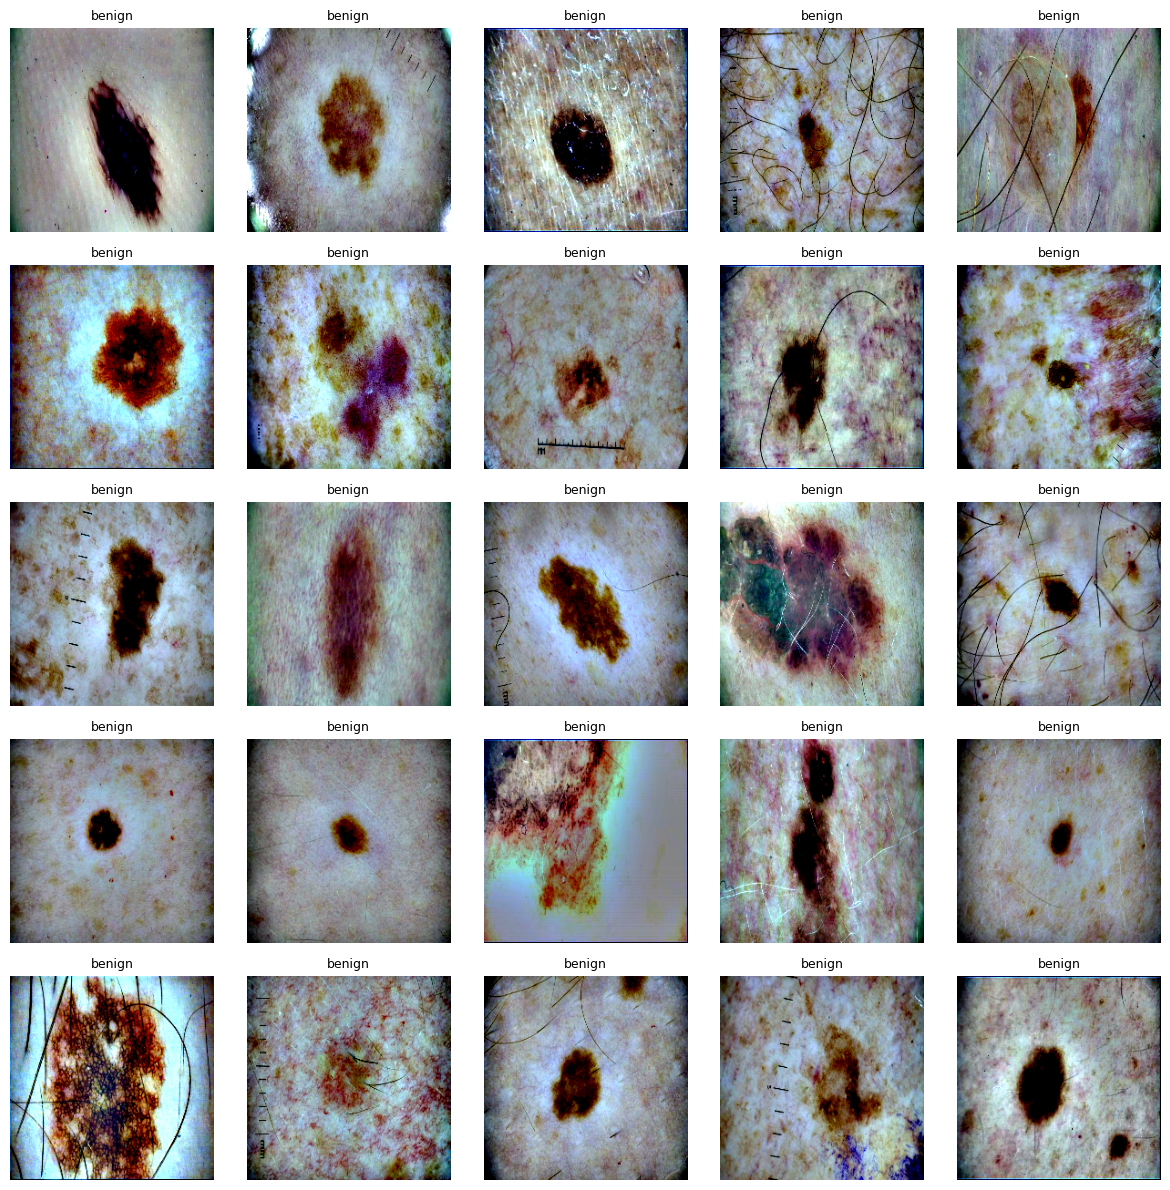

In [23]:
# --- Display a 5×5 grid (or fewer if <25 images) ---
cols, rows = 5, 5
n_images = min(25, len(image_paths))
fig, ax = plt.subplots(rows, cols, figsize=(12, 12))

for i in range(n_images):
    img = preprocess_image_with_ben(image_paths[i])
    r, c = divmod(i, cols)
    ax[r, c].imshow(img)
    ax[r, c].axis("off")
    ax[r, c].set_title(labels[i], fontsize=9)

# Hide empty cells if dataset has <25 images
for j in range(n_images, rows*cols):
    r, c = divmod(j, cols)
    ax[r, c].axis("off")

plt.tight_layout()
plt.show()


In [2]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
IMG_SIZE = 224
base_dir = r"ISIC_2020"

#### 2️⃣ Preprocessing (same crop + Gaussian blur you used)

In [17]:
# ----- Preprocessing Functions (unchanged) -----
def crop_image_from_gray(img, tol=7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1), mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        if img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0] == 0:
            return img
        img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
        img2 = img[:, :, 1][np.ix_(mask.any(1), mask.any(0))]
        img3 = img[:, :, 2][np.ix_(mask.any(1), mask.any(0))]
        return np.stack([img1, img2, img3], axis=-1)

def preprocess_image_with_ben(path, sigmaX=40):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = crop_image_from_gray(image)
    image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), sigmaX), -4, 128)
    return image

In [18]:
# ----- Gather file paths & labels -----
image_paths = []
labels      = []
for cls in ["Benign", "Malignant"]:
    folder = os.path.join(base_dir, cls)
    for fname in os.listdir(folder):
        if fname.lower().endswith((".jpg", ".jpeg", ".png")):
            image_paths.append(os.path.join(folder, fname))
            labels.append(cls)

print(f"Found {len(image_paths)} images "
      f"(Benign={labels.count('Benign')}, Malignant={labels.count('Malignant')})")

Found 9 images (Benign=5, Malignant=4)


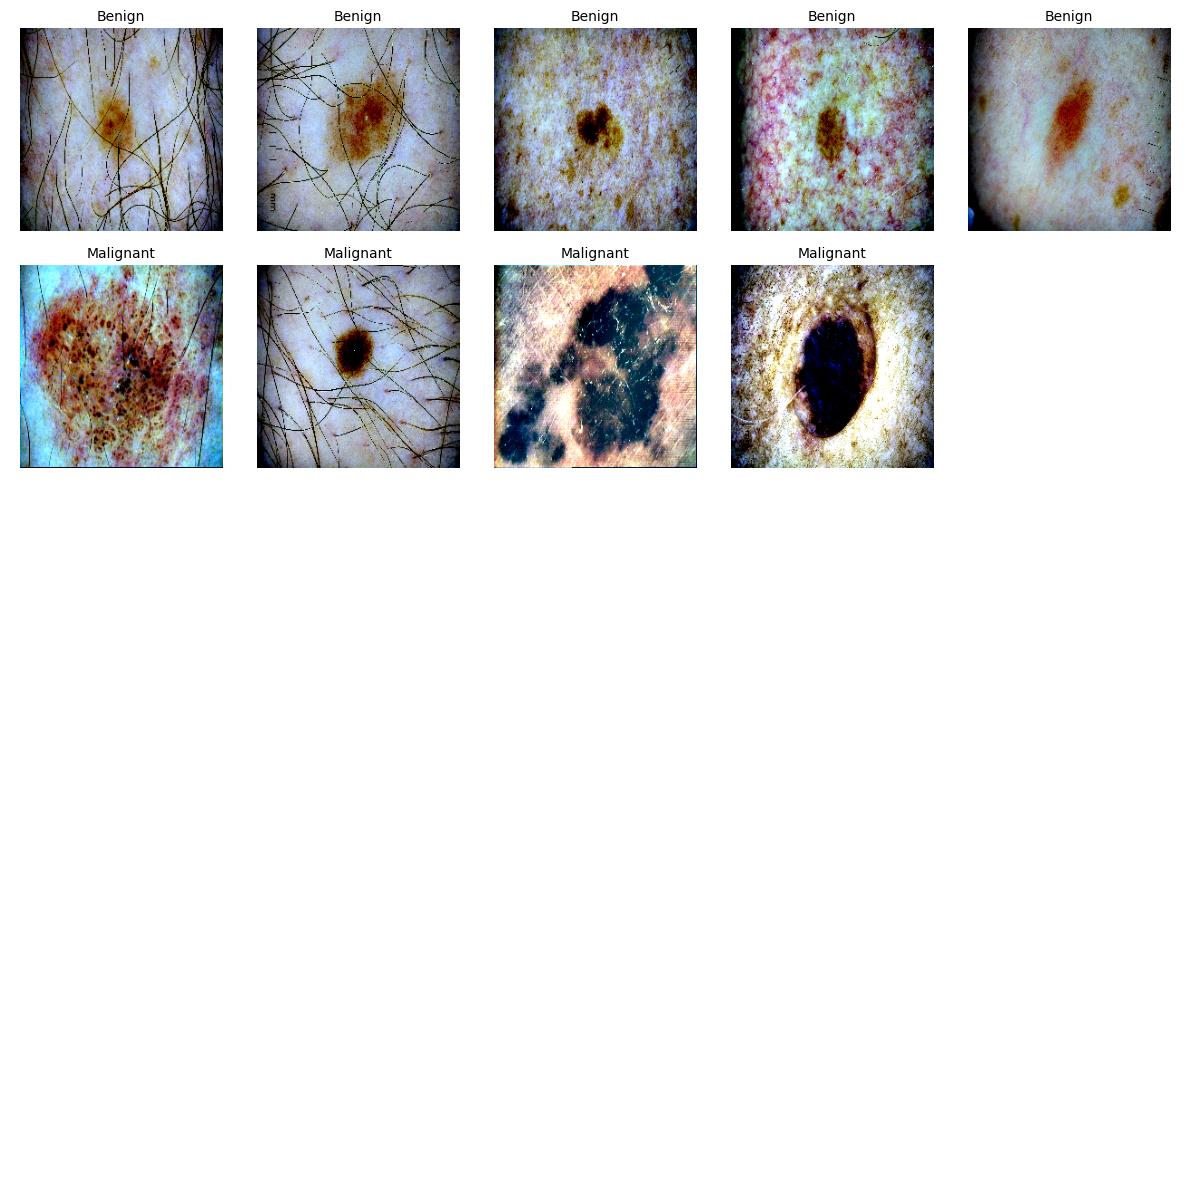

In [19]:
# ----- Display Grid -----
n_images = min(25, len(image_paths))     # up to 25 images
cols, rows = 5, 5
fig, ax = plt.subplots(rows, cols, figsize=(12, 12))

for i in range(n_images):
    img = preprocess_image_with_ben(image_paths[i])
    r, c = divmod(i, cols)
    ax[r, c].imshow(img)
    ax[r, c].axis("off")
    ax[r, c].set_title(labels[i], fontsize=10)

# Hide empty cells if <25 images
for j in range(n_images, rows*cols):
    r, c = divmod(j, cols)
    ax[r, c].axis("off")

plt.tight_layout()
plt.show()

## Import Important Libraries.

In [1]:
import numpy as np
import tensorflow as tf
import cv2
from keras import layers
from keras.applications import DenseNet121
from tensorflow.keras import regularizers
from keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
from tqdm import tqdm
import seaborn as sns

IMG_SIZE = 224
BATCH_SIZE = 8

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\api\preprocessing\image\__init__.py)

## Data Preprocessing.

In [3]:
train_df = pd.read_csv('Train.csv')
val_df = pd.read_csv('Val.csv')
test_df = pd.read_csv('Test.csv')
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(3000, 2)
(1750, 2)
(1750, 2)


In [4]:
train_df.head()

id_code  diagnosis
0  007-0572-000.jpeg          0
1  007-0573-000.jpeg          0
2  007-0575-000.jpeg          0
3  007-0576-000.jpeg          0
4  007-0577-000.jpeg          0

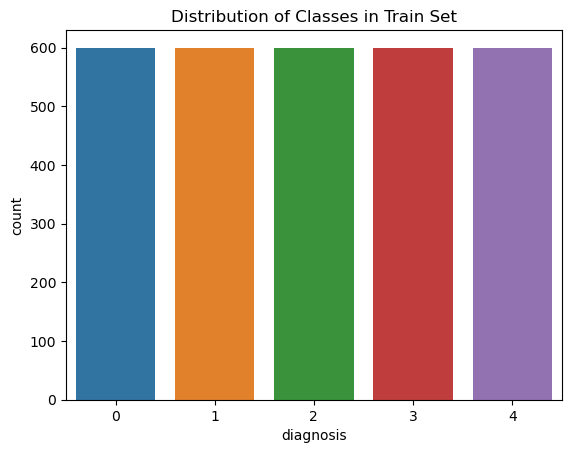

In [5]:
sns.countplot(x='diagnosis', data=train_df)
plt.title('Distribution of Classes in Train Set')
plt.show()


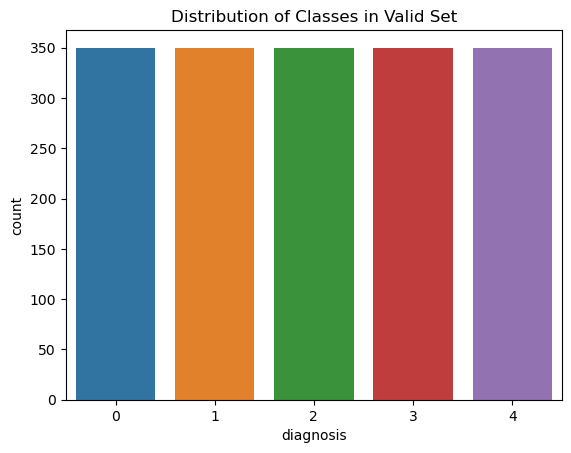

In [6]:
sns.countplot(x='diagnosis', data=val_df)
plt.title('Distribution of Classes in Valid Set')
plt.show()


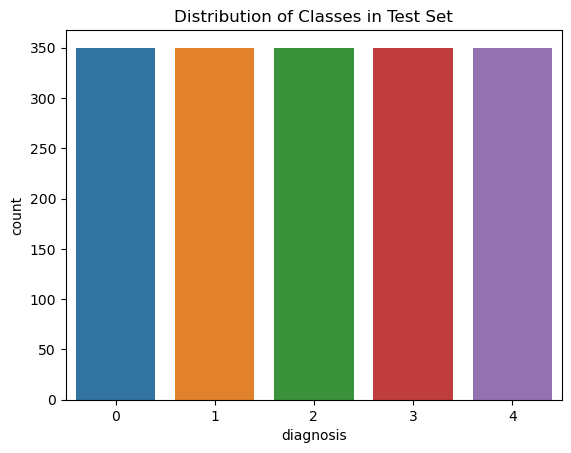

In [7]:
sns.countplot(x='diagnosis', data=test_df)
plt.title('Distribution of Classes in Test Set')
plt.show()


## Displaying some Sample Images

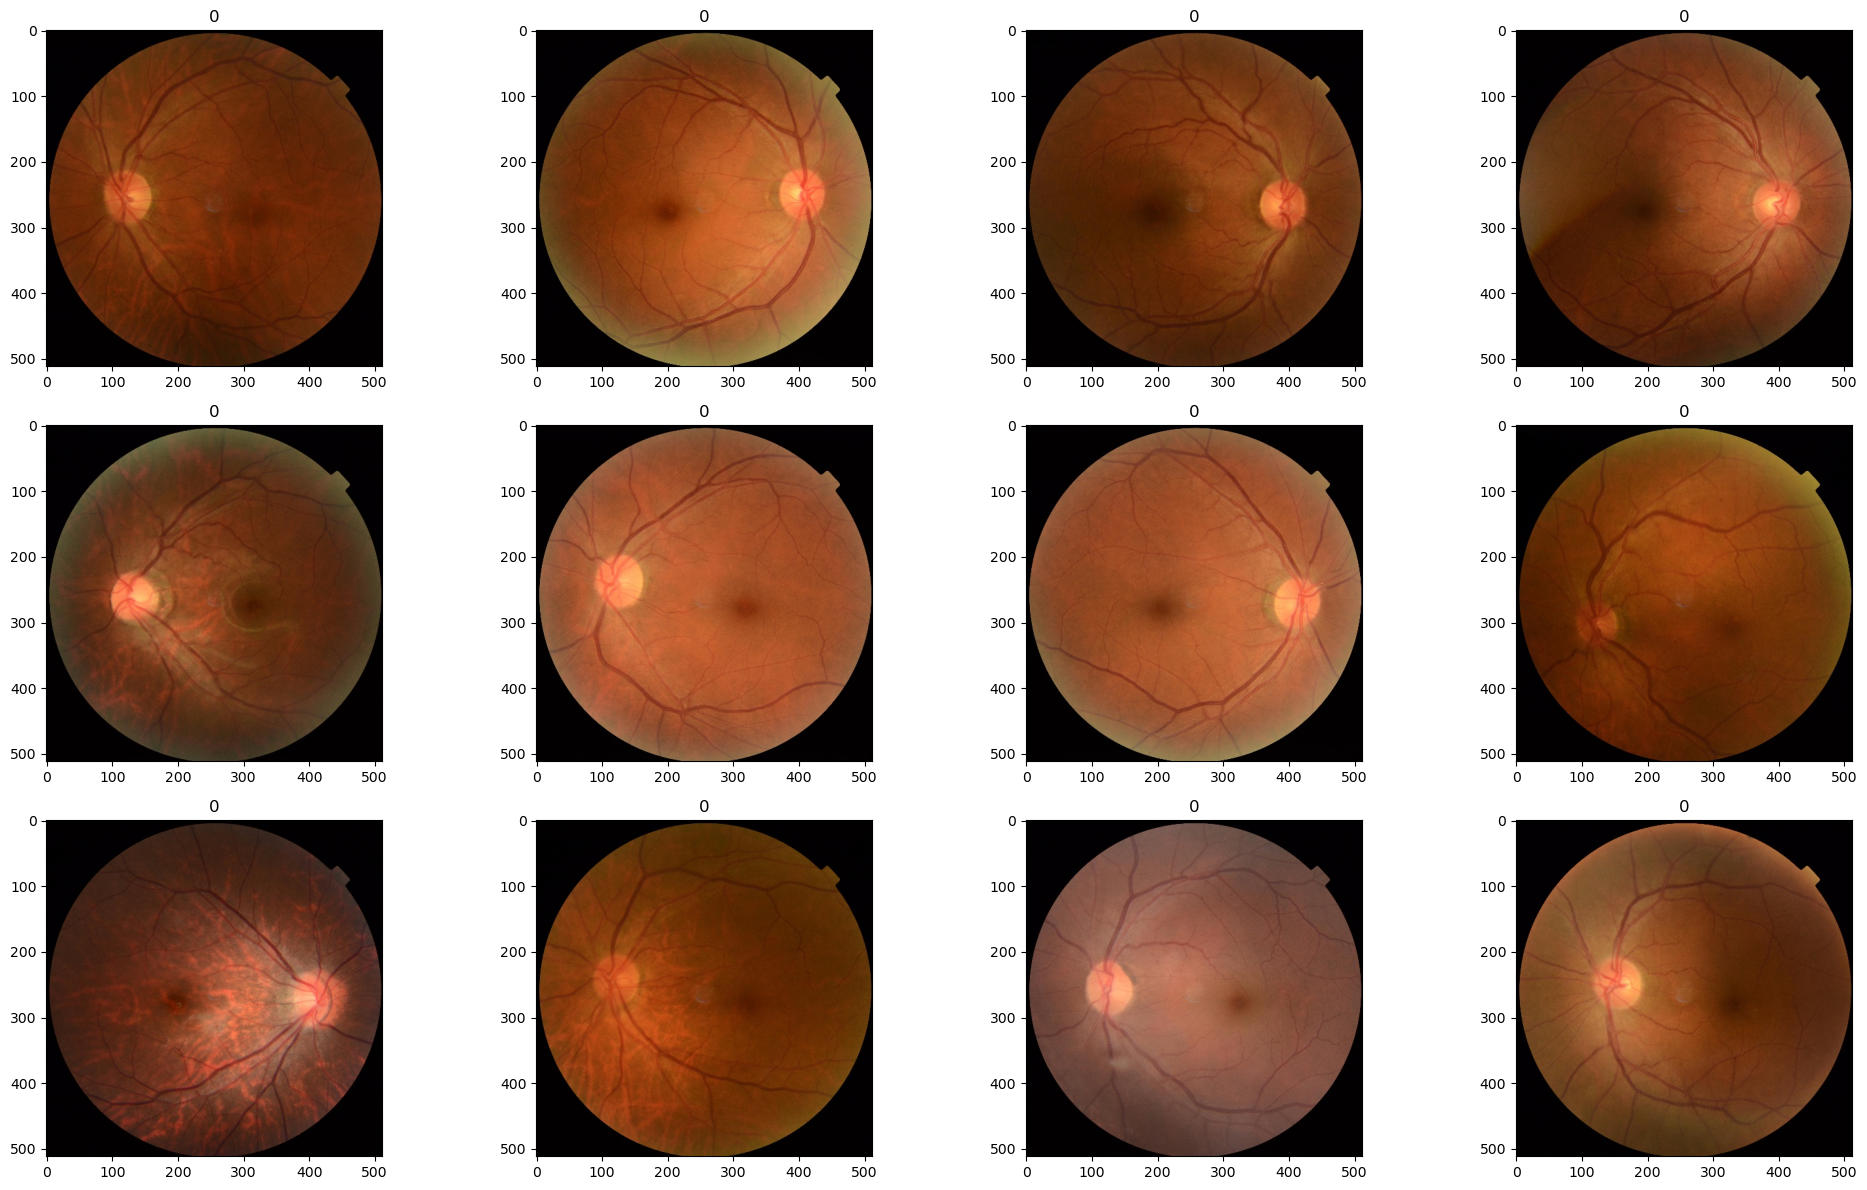

In [ ]:
def display_samples(df, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'Train_Images/{image_path}')

        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.axis('on')
        plt.imshow(img)

    plt.tight_layout()

display_samples(train_df)

## Ben's preprocessing and Cropping images
We will resize the images to 224x224, then create a single numpy array to hold the data.

In [ ]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol

        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img 
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

def preprocess_image_with_ben(path, sigmaX=30):
    image = cv2.imread(path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = crop_image_from_gray(image)
    image=cv2.addWeighted(image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)

    return image



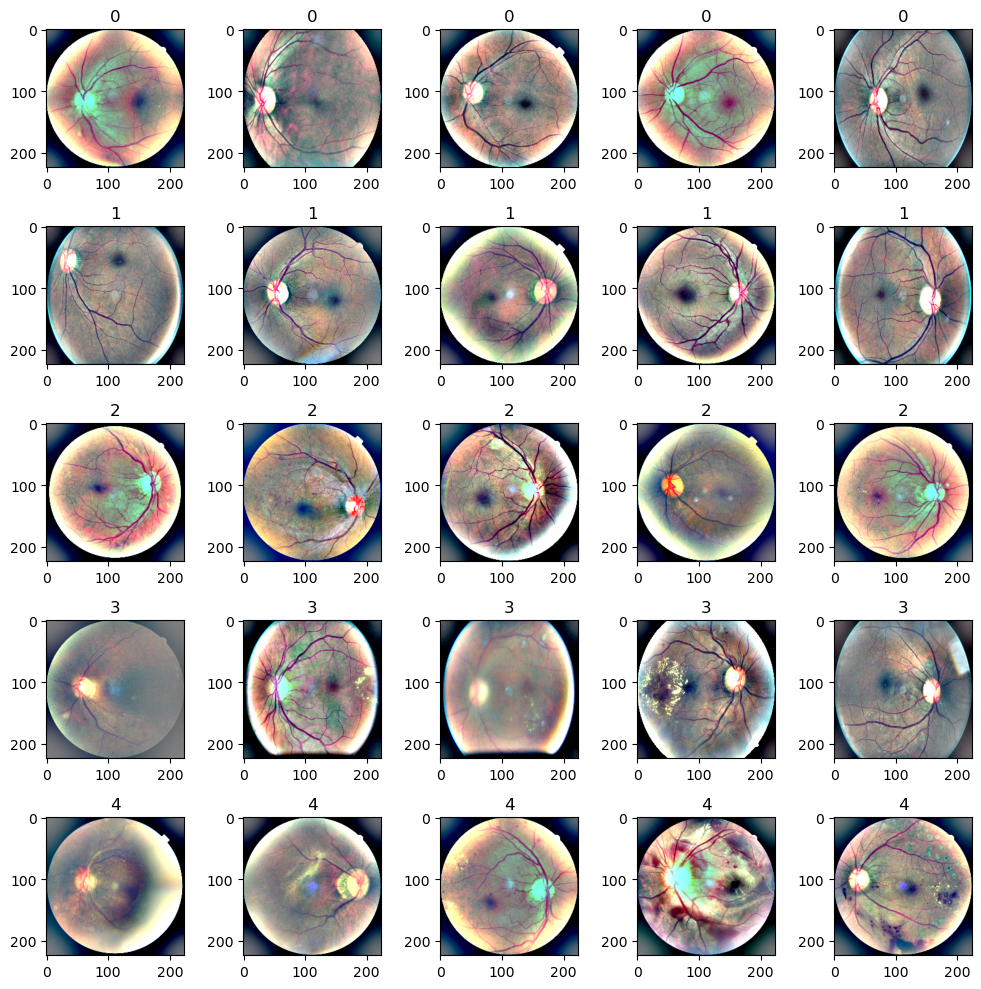

In [ ]:
fig,ax=plt.subplots(5,5,figsize=(10,10))
for i in range(25):
    data=train_df[train_df['diagnosis']==i//5].reset_index()
    img_code=data['id_code'][a]
    img=preprocess_image_with_ben(f'Train_Images/{img_code}')
    ax[i//5,i%5].imshow(img)
    ax[i//5,i%5].axis('on')
    ax[i//5,i%5].set_title(data['diagnosis'][a])

plt.tight_layout()
plt.show()

In [ ]:
N = train_df.shape[0]
x_train = np.empty((N, IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)

for i, image_id in enumerate(tqdm(train_df['id_code'])):
    x_train[i, :, :, :] = preprocess_image_with_ben(
        f'Train_Images/{image_id}'
    )

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [10:54<00:00,  4.59it/s]


In [ ]:
N = val_df.shape[0]
x_val = np.empty((N, IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)

for i, image_id in enumerate(tqdm(val_df['id_code'])):
    x_val[i, :, :, :] = preprocess_image_with_ben(
        f'Val_Images/{image_id}'
    )

100%|██████████████████████████████████████████████████████████████████████████████| 1750/1750 [08:00<00:00,  3.65it/s]


In [ ]:
N = test_df.shape[0]
x_test = np.empty((N, IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)

for i, image_id in enumerate(tqdm(test_df['id_code'])):
    x_test[i, :, :, :] = preprocess_image_with_ben(
        f'Test_Images/{image_id}'
    )

100%|██████████████████████████████████████████████████████████████████████████████| 1750/1750 [04:42<00:00,  6.20it/s]


In [6]:
y_train = pd.get_dummies(train_df['diagnosis']).values
y_val = pd.get_dummies(val_df['diagnosis']).values
y_test = pd.get_dummies(test_df['diagnosis']).values

# Print the output shapes.
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(3000, 224, 224, 3)
(3000, 5)
(1750, 224, 224, 3)
(1750, 5)
(1750, 224, 224, 3)
(1750, 5)


In [7]:
def create_datagen():
    return ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.1,
        zoom_range=0.25,
        fill_mode='nearest',
        horizontal_flip=True,
        vertical_flip=True,
    )

# Train Data-generator
train_generator = create_datagen().flow(x_train, y_train, batch_size=BATCH_SIZE)


## Model : DenseNet121

In [8]:
densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE,IMG_SIZE,3)
)

29084464/29084464 [==============================] - 2s 0us/step


## MC Dropout Function.

In [ ]:
def MC_Dropout(model, x, samples=20):
    yhat_arr = []

    for t in range(samples):
        yhat = model(x, training=True)
        yhat_arr.append(yhat)

    yhat_arr = np.stack(yhat_arr, -1)
    probs = np.mean(yhat_arr, axis=-1)
    entropy = - 1.0 * np.sum(probs * np.log(probs + 1e-16), axis=-1)
    return probs, entropy

## Model Building.

In [9]:
def build_model():
    model = Sequential()
    model.add(densenet)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(5, activation='softmax'))
    
    for layer in model.layers[-8:]:
        layer.trainable = True

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

    return model

In [10]:
# Build Model
model = build_model()

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                        

## Training and Evaluation

In [11]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/100
375/375 [==============================] - 154s 220ms/step - loss: 0.5569 - accuracy: 0.3117 - val_loss: 0.4007 - val_accuracy: 0.5020
Epoch 2/100
375/375 [==============================] - 67s 178ms/step - loss: 0.4592 - accuracy: 0.4470 - val_loss: 0.3450 - val_accuracy: 0.5833
Epoch 3/100
375/375 [==============================] - 69s 185ms/step - loss: 0.4122 - accuracy: 0.5043 - val_loss: 0.3258 - val_accuracy: 0.6220
Epoch 4/100
375/375 [==============================] - 83s 222ms/step - loss: 0.3789 - accuracy: 0.5560 - val_loss: 0.2931 - val_accuracy: 0.6713
Epoch 5/100
375/375 [==============================] - 71s 190ms/step - loss: 0.3631 - accuracy: 0.5757 - val_loss: 0.3767 - val_accuracy: 0.5610
Epoch 6/100
375/375 [==============================] - 73s 194ms/step - loss: 0.3465 - accuracy: 0.6063 - val_loss: 0.2920 - val_accuracy: 0.6573
Epoch 7/100
375/375 [==============================] - 68s 181ms/step - loss: 0.3283 - accuracy: 0.6343 - val_loss: 0.2437 

## Results Visualization

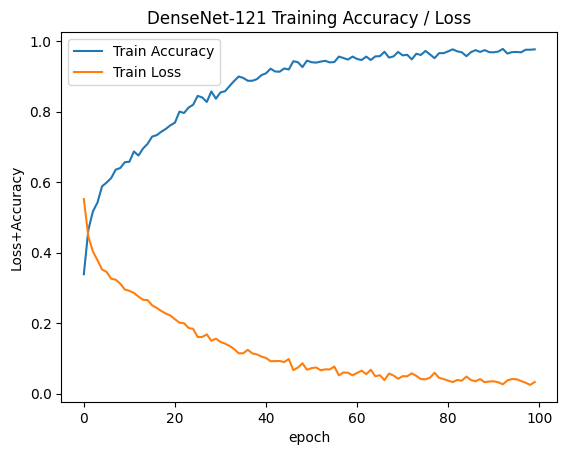

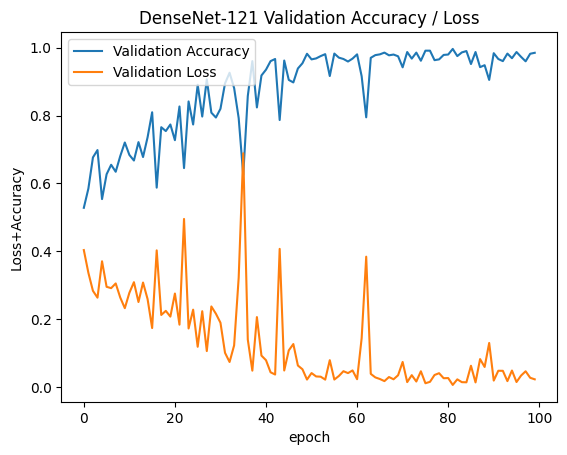

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('DenseNet-121 Training Accuracy / Loss')
plt.ylabel('Loss+Accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Train Loss'], loc='upper left')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('DenseNet-121 Validation Accuracy / Loss')
plt.ylabel('Loss+Accuracy')
plt.xlabel('epoch')
plt.legend(['Validation Accuracy', 'Validation Loss'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test set
test_results = model.evaluate(x_test, y_test)

# Make predictions on the test set
y_pred = model.MC_Dropout(model, x_test, samples=20)

55/55 [==============================] - 5s 86ms/step


In [ ]:
# Convert the one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate the classification report
class_report = classification_report(y_true_labels, y_pred_labels)

print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       0.95      1.00      0.97       350
           2       1.00      0.98      0.99       350
           3       0.98      0.97      0.97       350
           4       1.00      0.98      0.99       350

    accuracy                           0.99      1750
   macro avg       0.99      0.99      0.99      1750
weighted avg       0.99      0.99      0.99      1750



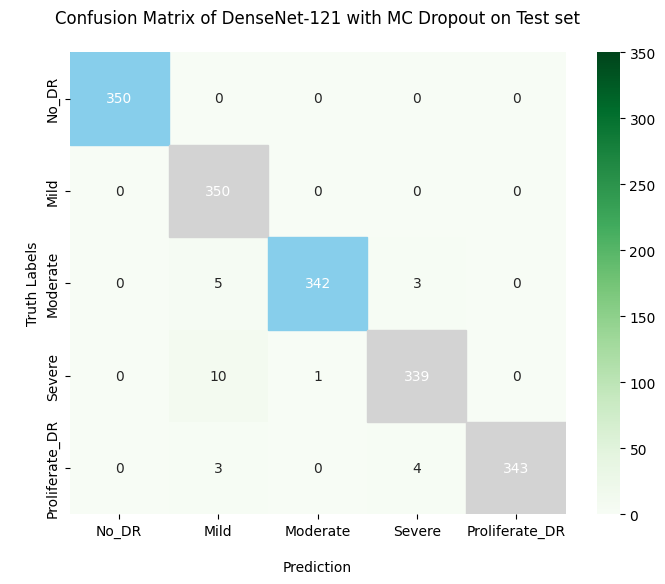

In [ ]:
conf_mat = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'],
            yticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR'])

ax = plt.gca()

colors = ['skyblue', 'lightgray', 'skyblue', 'lightgray', 'lightgray']

for i in range(len(conf_mat)):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color=colors[i]))

plt.xlabel('\nPrediction')
plt.ylabel('\nTruth Labels')
plt.title('Confusion Matrix of DenseNet-121 with MC Dropout on Test set\n')
plt.show()


## Uncertainty Quantification of DenseNet-121 (MC Dropout) Model.

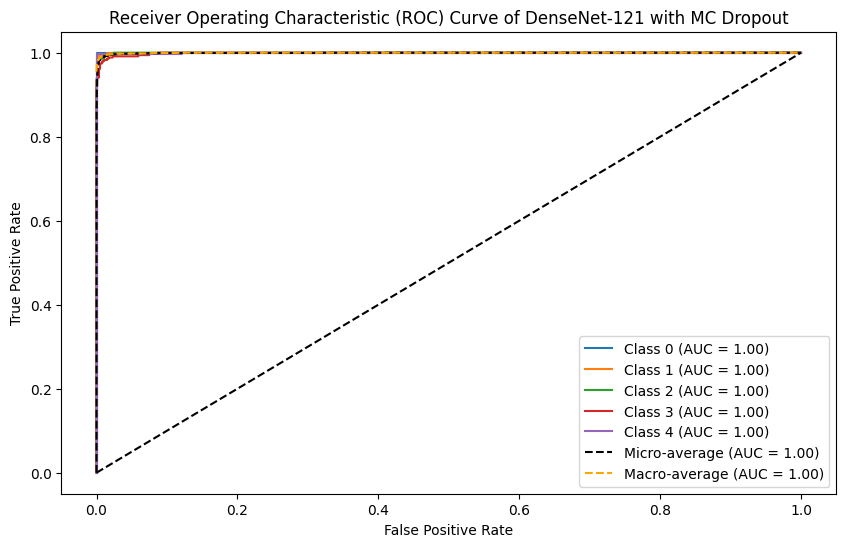

In [ ]:
# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()

# For each class, calculate ROC curve and area under the curve
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_true_labels) == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate micro-average ROC curve and area under the curve
micro_fpr, micro_tpr, _ = roc_curve(np.ravel(np.eye(5)[y_true_labels]), y_pred.ravel())
roc_auc["micro"] = auc(micro_fpr, micro_tpr)

# Calculate macro-average ROC curve and area under the curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 5

roc_auc["macro"] = auc(all_fpr, mean_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(micro_fpr, micro_tpr, label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', linestyle='--', color='black')

# Plot macro-average ROC curve
plt.plot(all_fpr, mean_tpr, label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})', linestyle='--', color='orange')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of DenseNet-121 with MC Dropout')
plt.legend()
plt.show()


## Calibration Curve.

In [ ]:
def multiclass_calibration_curve(probs, labels, bins=10):
    step_size = 1.0 / bins
    n_classes = probs.shape[1]
    labels_ohe = np.eye(n_classes)[labels.astype(np.int64)]

    midpoints = []
    mean_confidences = []
    accuracies = []

    for i in range(bins):
        beg = i * step_size
        end = (i + 1) * step_size

        bin_mask = (probs >= beg) & (probs < end)
        bin_cnt = bin_mask.astype(np.float32).sum()
        bin_confs = probs[bin_mask]
        bin_acc = labels_ohe[bin_mask].sum() / bin_cnt

        midpoints.append((beg+end)/2.)
        mean_confidences.append(np.mean(bin_confs))
        accuracies.append(bin_acc)

    return midpoints, accuracies, mean_confidences

def plot_multiclass_calibration_curve(probs, labels, bins=10, title=None):
    title = 'Reliability Diagram' if title is None else title
    midpoints, accuracies, mean_confidences = multiclass_calibration_curve(probs, labels, bins=bins)
    plt.bar(midpoints, accuracies, width=1.0/float(bins), align='center', lw=1, ec='#000000', fc='#2233aa', alpha=1, label='Model', zorder=0)
    plt.scatter(midpoints, accuracies, lw=2, ec='black', fc="#ffffff", zorder=2)
    plt.plot(np.linspace(0, 1.0, 20), np.linspace(0, 1.0, 20), '--', lw=2, alpha=.7, color='gray', label='Perfectly calibrated', zorder=1)
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)
    plt.xlabel('\nconfidence')
    plt.ylabel('accuracy\n')
    plt.title(title+'\n')
    plt.xticks(midpoints, rotation=-45)
    plt.legend(loc='upper left')
    return midpoints, accuracies, mean_confidences

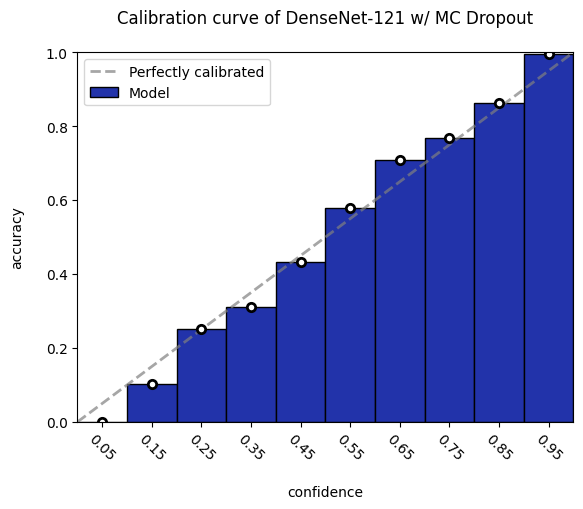

In [ ]:
probs, entropy = MC_Dropout(model, x_test, samples=20)
MC_Results = plot_multiclass_calibration_curve(probs, y_test, bins=10, title='Calibration curve of DenseNet-121 w/ MC Dropout')